# Preprocesamiento de Datos

### Visualizacion de datos

In [230]:
import pandas as pd

pd.set_option('display.max_columns', None)

#Lectura de la base de datos
df = pd.read_csv('DB/cars.csv', sep=';') # Cambio en el separador
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,2.30,1818,0,1,3,21,3


### Valores nulos

Vamos a realizar un analisis de los valores nulos (NaN).

Para ello comenzamos leyendo los datos y viendo cuantos datos faltantes hay por columna:

In [231]:
#Valores nulos
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
CODE,0
PRODUCTO,0
TIPO_CARROCERIA,0
COMBUSTIBLE,0
Potencia_,0
TRANS,0
FORMA_PAGO,0
ESTADO_CIVIL,890
GENERO,860
OcupaciOn,0


Vemos que tenemos datos nulos en 4 columnas, vamos a mostrar el contenido de dichas columnas en un dataframe por separado para una mayor visualizacion

In [232]:
null_df = df[['Averia_grave', 'ESTADO_CIVIL', 'GENERO', 'Zona _Renta']]
null_df

,Averia_grave,ESTADO_CIVIL,GENERO,Zona _Renta
0,Averia muy grave,CASADO,M,Medio-Bajo
1,No,CASADO,F,Medio-Bajo
2,No,CASADO,M,Medio
3,Averia muy grave,CASADO,F,Medio
4,No,CASADO,F,Alto
...,...,...,...,...
58044,Averia muy grave,SOLTERO,F,NaN
58045,No,NaN,NaN,Medio-Bajo
58046,No,CASADO,M,Medio
58047,No,CASADO,M,Medio-Bajo


Vemos los valores faltantes. 

En este caso, vamos a sustituirlos por 'Desconocido' (ya que estas columnas no son de tipo numerico), salvo en el caso de la columna 'Averia_grave', que al contener un unico valor faltante, vamos a dropear el registro en el que se encuentre dicho valor: 

In [233]:
null_cols = []
# Sustituimos valores nulos
for column, count in df_nulls['Nulos'].items():
    if count != 0:
        null_cols.append(column)
        if column == 'Averia_grave':
            df.dropna(subset=[column], inplace=True)
        elif column == 'ESTADO_CIVIL':
            df[column] = df[column].fillna('DESCONOCIDO')
        elif column == 'GENERO':
            df[column] = df[column].fillna('O')
        elif column == 'Zona _Renta':
            df[column] = df[column].fillna('Desconocido')   

# Una vez que se han eliminado los valores nulos, verificamos que hemos hecho la transoformacion correctamente
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls.loc[null_cols]

,Nulos
ESTADO_CIVIL,0
GENERO,0
Zona _Renta,0
Averia_grave,0


Vemos que hemos solucionado el problema de los valores nulos perfectamente.

### Heatmap y boxplots

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

Para ver la relación entre las variables utilizaremos el heatmap, que nos ofrece una imagen de calor muy visual para detectar casos de multicolinearidad.

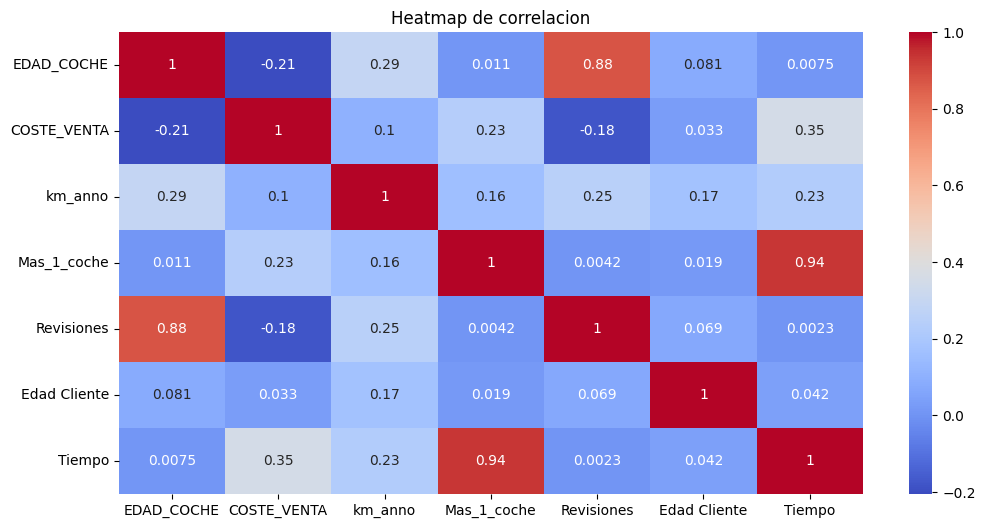

In [235]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
corr = df[num_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

Como vemos hay variables muy relacionadas entre sí. Esto no va a favorecer a nuestro modelo, por lo que las vamos a eliminar:

In [236]:
df.drop(['Tiempo', 'Revisiones'], axis=1, inplace=True)

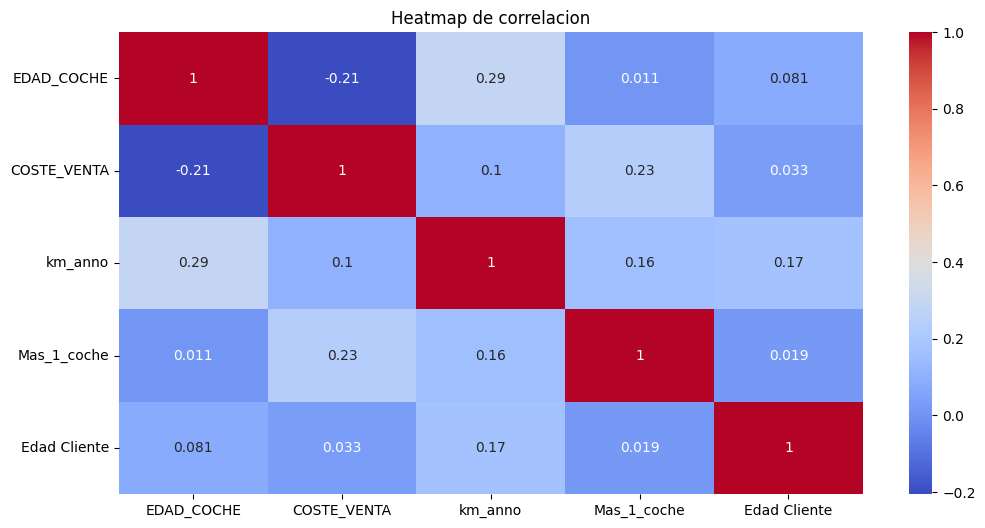

In [237]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
corr = df[num_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

Ahora ya vemos que no hay ninguna variable muy relacionada entre sí.

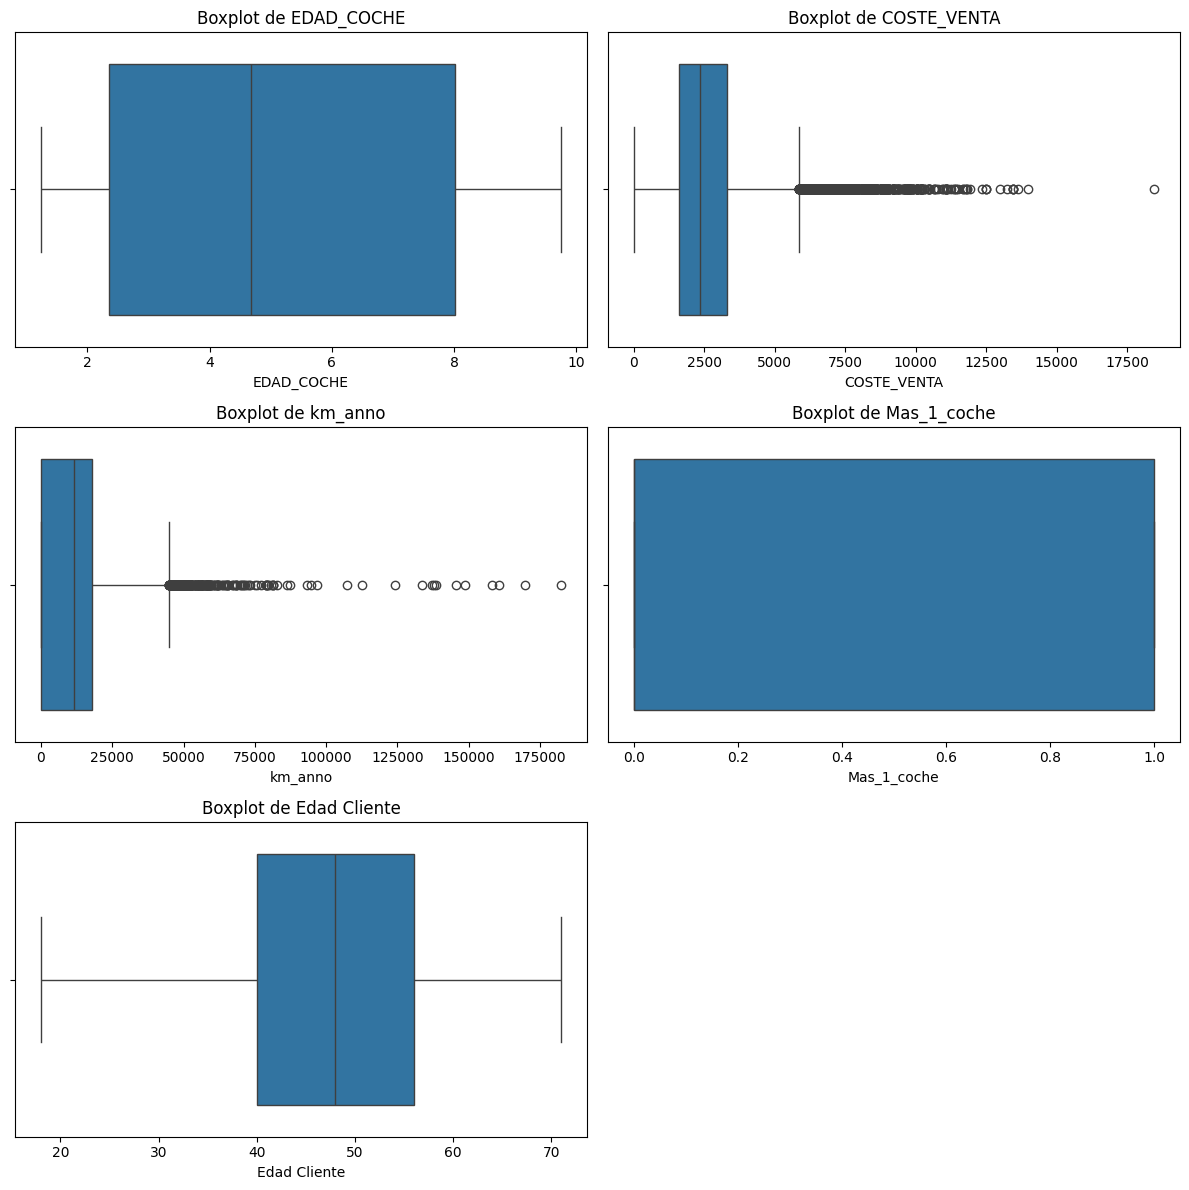

In [238]:
def show_boxplots(df):
    # Seleccionamos las columnas numericas
    num_col = df.select_dtypes(include=['float64', 'int64']).columns

    # Definimos el número de columnas para mostrar por fila
    n_cols = 2
    n_rows = len(num_col) // n_cols + (len(num_col) % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axes = axes.flatten()  # Aplanar la matriz de ejes

    # Creamos los diagramas de caja (boxplots)
    for i, col in enumerate(num_col):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}')

    # Eliminamos los subplots vacios, por estetica
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Mostrar la figura con los subplots
    plt.tight_layout()
    plt.show()

show_boxplots(df)


### Outliers

Vamos a pasar a gestionar los valores atipicos (outliers). 

Podemos ver del diagrama de cajas anterior que estos se presentan principalmente en las columnas COSTE_VENTA y km_anno, por lo que procedemos con su analisis.

Para una mayor fiabilidad de los datos es importante eliminar valores atípicos que puedan influir de manera significativa en nuestra muestra de datos. Para ello, lo mejor es localizarlos y eliminarlos de nuestra base de datos.

Primero definimos los cuartiles del 25%, 75% y el rango intercuartilico:

In [239]:
df_outliers = df[['COSTE_VENTA', 'km_anno']]
print("\n\nConteo inicial:\n", df_outliers.count(), '\n')

Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1



Conteo inicial:
 COSTE_VENTA    58048
km_anno        58048
dtype: int64 



Vemos que inicialmente nuestros datos son 58048. Veremos proximamente la cantidad de estos tras el analisis.

Ahora definiremos los límites con los que acotaremos la muestra, se suele emplear que no sean más pequeños de 3/4 que el valor del Q1, ni más mayores de 3/4 que el valor Q3.

In [240]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Con esto ya podemos identificar y eliminar los outliers:

In [241]:
# Localizamos los outliers
outliers = df_outliers[(df_outliers < lower_bound) | (df_outliers > upper_bound)]

# Mostramos la cantidad de outliers
outliers.count()

COSTE_VENTA    2157
km_anno         321
dtype: int64

In [242]:
# Eliminar filas con outliers en 'COSTE_VENTA' y 'km_anno'
db_cleaned = df[~((df['COSTE_VENTA'].isin(outliers['COSTE_VENTA'])) | (df['km_anno'].isin(outliers['km_anno'])))]

print("\n\nConteo final:\n", db_cleaned[['COSTE_VENTA', 'km_anno']].count(), '\n')



Conteo final:
 COSTE_VENTA    55622
km_anno        55622
dtype: int64 



Podemos verificar que ahora el numero de datos es 55622, lo que signifca que hemos eliminado bastantes datos atipicos de nuestra muestra. 

No obstante, esta perdida de informacion no es significante ya que supone un 5% de los datos aproximadamente.

Veamos los resultado en los boxplots.

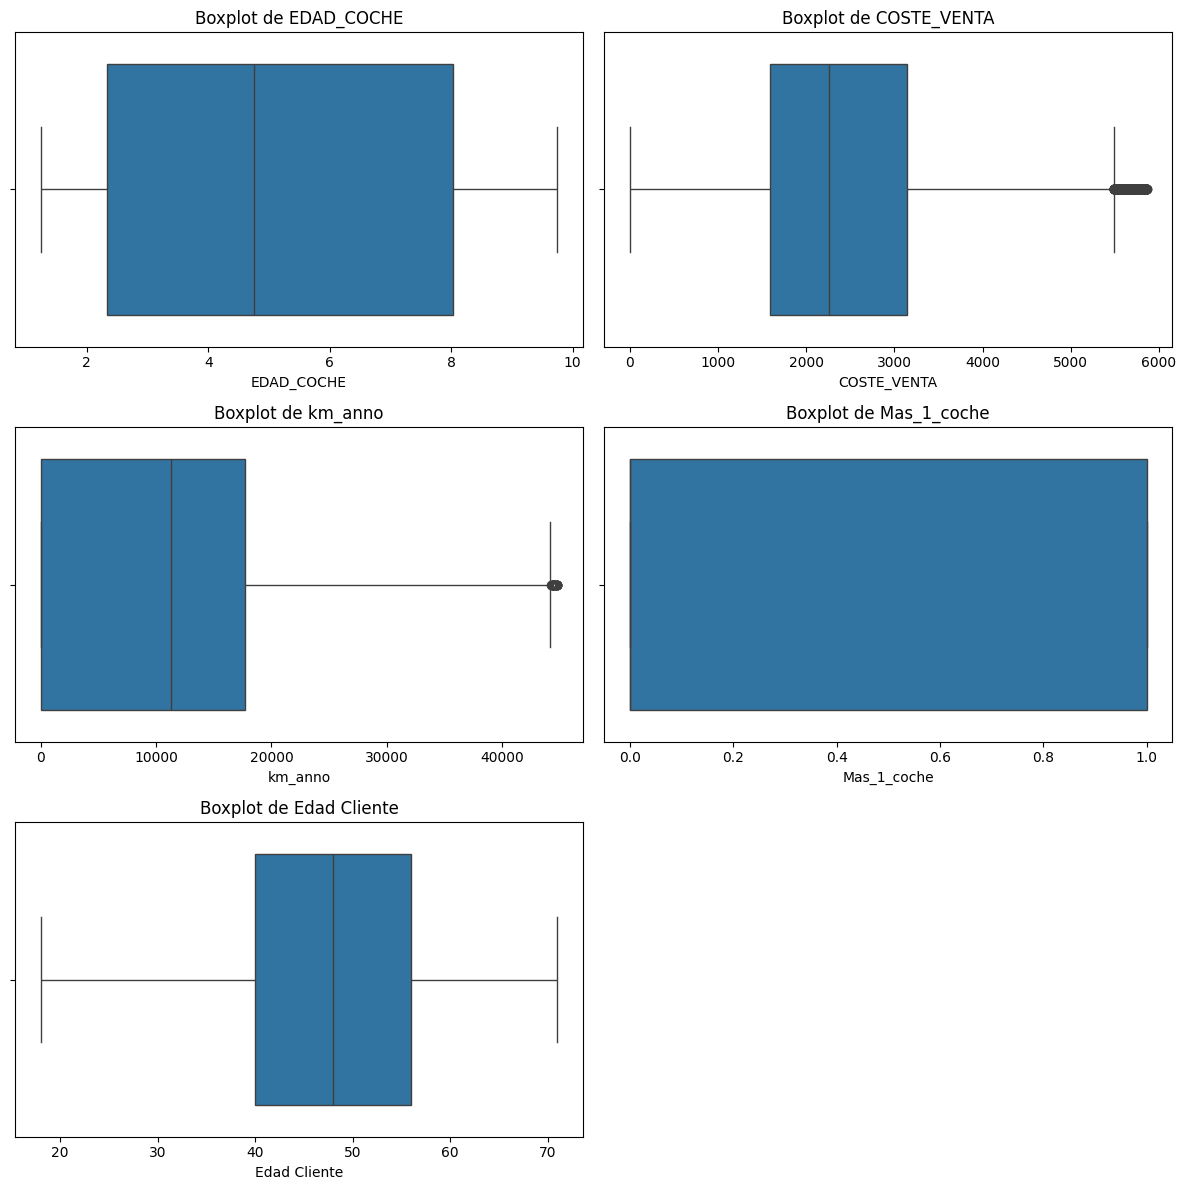

In [243]:
show_boxplots(db_cleaned)

Vemos que sigue habiendo algún valor atípico, pero están dentro de los límites contemplados, por lo que su influencia no es muy significativa.

Ahora guardemos los datos en un nuevo csv que será el definitivo.

In [244]:
df.to_csv('DB/cleaned/cars_cleaned_outliers.csv', sep=',', index=False)

### Codificacion de Variables Categoricas

Para manejar las variables categoricas, vamos a aplicar el Label Encoder de sklearn para pasar de tipo objecto a numerico, permitiendo asi poder utilizar el mayor numero de datos posible en nuestro modelo de prediccion.

Lo hacemos de la siguiente manera:

In [245]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    cat_col = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in cat_col:
        df[col] = le.fit_transform(df[col])
    return df

df = label_encoder(df)
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Edad Cliente
0,0,0,0,0,1,1,0,0,1,1,4,1,0,0,3,0,2,1,2.08,2892,0,0,18
1,11111,0,0,0,1,1,0,0,0,1,47,0,0,0,3,1,3,0,2.45,1376,7187,0,53
2,22222,0,0,0,1,1,3,0,1,1,30,0,0,0,2,0,3,0,2.51,1376,0,1,21
3,33333,0,0,0,1,1,2,0,0,1,32,1,0,0,2,1,2,1,2.43,2015,7256,1,48
4,44444,0,0,0,1,1,2,0,0,2,41,1,0,1,0,0,3,0,2.30,1818,0,1,21


In [246]:
import os
if not os.path.exists('DB/cleaned'):
    os.mkdir('DB/cleaned')
df.to_csv('DB/cleaned/cars_cleaned.csv', index=False)

# Desarrollo del Modelo de Propension y Evaluacion

### Arbol de Decision

Inicialmente, vamos a implementar un Arbol de Decision simple, para posteriormente mejorar la precision, accuracy, recall y f1 score, que son en principio las metricas de evaluacion del modelo que vamos a utlizar.

Comenzamos con un Arbol de Decision:

In [247]:
df = pd.read_csv('DB/cleaned/cars_cleaned.csv')

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

df = df.drop(['CODE', 'EDAD_COCHE'], axis=1)
X = df.drop('Mas_1_coche', axis=1)
y = df['Mas_1_coche']

# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

Evaluamos el modelo inicial (sin mejoras de rendimiento) para hacernos una idea de la exactitud, precision, recall y f1 score del modelo:

In [249]:
# Creamos una funcion para evaluar las predicciones del modelo, ya que vamos a reutilizar este codigo mucho
def evaluate_model(model, y_test, y_pred):
    print('\n', model)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precisión (Accuracy): {round(accuracy, 2)}")
    print(f"Precisión (Precision): {round(precision, 2)}")
    print(f"Recall: {round(recall, 2)}")
    print(f"F1 Score: {round(f1, 2)}")

    # Predecir el valor de Mas_1_coche para nuevos datos
    new_data = pd.read_csv('DB/cars_input.csv', sep=';')
    new_data = new_data.drop(['CODE', 'Revisiones'], axis=1)
    new_data = label_encoder(new_data)
    prediction = model.predict(new_data)

    print('No compran coche: ', round(np.sum(prediction == 0)/len(prediction), 2), '%')
    print('Compran coche: ', round(np.sum(prediction == 1)/len(prediction), 2), '%')

evaluate_model(dt_model, y_test, y_pred)


 DecisionTreeClassifier()
Precisión (Accuracy): 0.84
Precisión (Precision): 0.72
Recall: 0.72
F1 Score: 0.72
No compran coche:  0.67 %
Compran coche:  0.33 %


### Mejora del modelo

En primer lugar vamos probar con distintos modelos y diferentes hiperparametros para mejorar la precisión de los modelos.

Tras esto, podremos centrarnos en un modelo en especifico y ajustar un poco mas los hiperparametros para poder equilibrar el resto de metricas y que no esten muy desbalanceadas.

In [250]:
# Diccionario de hiperparámetros para cada modelo
param_grids = {
    'DecisionTreeClassifier': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'GradientBoostingClassifier': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 10]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

Probamos con distintos modelos para ver con cual nos quedamos:

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV



def predict_model(df, model: str = 'DecisionTreeClassifier'):
    # Seleccionar las columnas predictoras (resto de datos)
    df = df.drop(['CODE', 'EDAD_COCHE'], axis=1)
    X = df.drop('Mas_1_coche', axis=1)
    y = df['Mas_1_coche']

    # Separar los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear un modelo de árbol de decisión
    if model == 'DecisionTreeClassifier':
        base_model = DecisionTreeClassifier()
    elif model == 'KNeighborsClassifier':
        base_model = KNeighborsClassifier()
    elif model == 'RandomForestClassifier':
        base_model = RandomForestClassifier()
    elif model == 'GradientBoostingClassifier':
        base_model = GradientBoostingClassifier()
    elif model == 'AdaBoostClassifier':
        base_model = AdaBoostClassifier()
    else:
        raise ValueError('Modelo no reconocido')
    
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grids[model], cv=5, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo optimizado
    best_model = grid_search.best_estimator_
    print(f"Mejores hiperparámetros para {model}: {grid_search.best_params_}")

    y_pred = best_model.predict(X_test)
    
    return best_model, y_test, y_pred

In [252]:
'''df = pd.read_csv('DB/cleaned/cars_cleaned.csv')

models = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier']

for model in models:
    print('\n---------------- ', model, ' ----------------')
    model, y_test, y_pred = predict_model(df, model)
    evaluate_model(model, y_test, y_pred)'''

"df = pd.read_csv('DB/cleaned/cars_cleaned.csv')\n\nmodels = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier']\n\nfor model in models:\n    print('\n---------------- ', model, ' ----------------')\n    model, y_test, y_pred = predict_model(df, model)\n    evaluate_model(model, y_test, y_pred)"

Con esta informacion, vamos a escoger el Random Forest y el Gradient Boosting como modelos de prediccion, ya que son los modelos que obtienen una mayor precision, siendo estas del 86% y 91% respectivamente.

Sabiendo esto vamos a idear una nueva funcion para hallar los hiperparametros con los que obtenemos unas metricas de evaluacion consistentes: 

In [253]:
# Diccionario de hiperparámetros para cada modelo
param_grids = {
    'RandomForestClassifier': {
        'max_depth': [20],
        'min_samples_leaf': [2],
        'n_estimators': [160]
    },
    'GradientBoostingClassifier': {  # Primera configuración de GradientBoostingClassifier
        'learning_rate': [0.01],
        'n_estimators': [180],
        'max_depth': [10]
    },
    'GradientBoostingClassifier': {  # Segunda configuración de GradientBoostingClassifier
        'learning_rate': [0.01],
        'n_estimators': [120],
        'max_depth': [10]
    }
}


# RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=160)

# GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=120)
#  GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=180)


In [254]:
from itertools import product
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
#import numpy as np



# Función principal para entrenar y evaluar cada combinación de hiperparámetros
def predict_model(df, model_name, param_grid):
    # Preparar los datos
    df = df.drop(['CODE', 'EDAD_COCHE'], axis=1)
    X = df.drop('Mas_1_coche', axis=1)
    y = df['Mas_1_coche']

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Generar todas las combinaciones de los hiperparámetros
    keys, values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in product(*values)]

    # Iterar sobre cada combinación de hiperparámetros
    for combo in combinations:
        if model_name == 'RandomForestClassifier':
            model = RandomForestClassifier(**combo)
        elif model_name == 'GradientBoostingClassifier':
            model = GradientBoostingClassifier(**combo)
        else:
            raise ValueError('Modelo no reconocido')

        # Entrenar el modelo con la combinación de hiperparámetros actual
        model.fit(X_train, y_train)

        # Predecir en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Evaluar y mostrar los resultados
        evaluate_model(model, y_test, y_pred)

Con esto probamos los hiperparametros

In [255]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('DB/cleaned/cars_cleaned.csv', sep=',')

# Iterar sobre los modelos y probar todas las combinaciones de hiperparámetros
for model_name, param_grid in param_grids.items():
    print(f"\n------ Evaluando {model_name} ------")
    predict_model(df, model_name, param_grid)


------ Evaluando RandomForestClassifier ------



 RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=160)
Precisión (Accuracy): 0.86
Precisión (Precision): 0.8
Recall: 0.71
F1 Score: 0.75
No compran coche:  0.73 %
Compran coche:  0.27 %

------ Evaluando GradientBoostingClassifier ------

 GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=120)
Precisión (Accuracy): 0.86
Precisión (Precision): 0.87
Recall: 0.6
F1 Score: 0.71
No compran coche:  0.78 %
Compran coche:  0.22 %


Con esto ya podemos lanzar el modelo definitivo y ver distintas graficas para analizar el rendimiento de modelo:

In [256]:
def predict_model(df):
    # Preparar los datos
    df = df.drop(['CODE', 'EDAD_COCHE'], axis=1)
    X = df.drop('Mas_1_coche', axis=1)
    y = df['Mas_1_coche']

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #model = GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=120)
    #model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=160)

    # model = GradientBoostingClassifier()
    # model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=5)
    # model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_samples_split=3, min_samples_leaf=4)
    # model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120, max_depth=6, min_samples_split=5, min_samples_leaf=3)
    # model = GradientBoostingClassifier(learning_rate=0.03, n_estimators=80, max_depth=7, min_samples_split=4, min_samples_leaf=2)
    # model = GradientBoostingClassifier(learning_rate=0.02, n_estimators=130, max_depth=5, min_samples_split=2, min_samples_leaf=4)

    # Entrenar el modelo con la combinación de hiperparámetros actual
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Evaluar y mostrar los resultados
    evaluate_model(model, y_test, y_pred)

    return model, X_test, y_test, y_pred



model, X_test, y_test, y_pred = predict_model(df)


 GradientBoostingClassifier()
Precisión (Accuracy): 0.85
Precisión (Precision): 0.79
Recall: 0.66
F1 Score: 0.72
No compran coche:  0.72 %
Compran coche:  0.28 %


### Matriz de Confusion

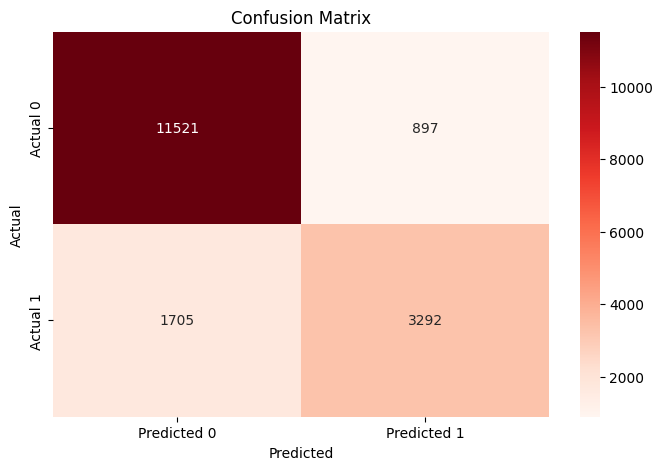

In [257]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Curva ROC y AUC

AUC: 0.92


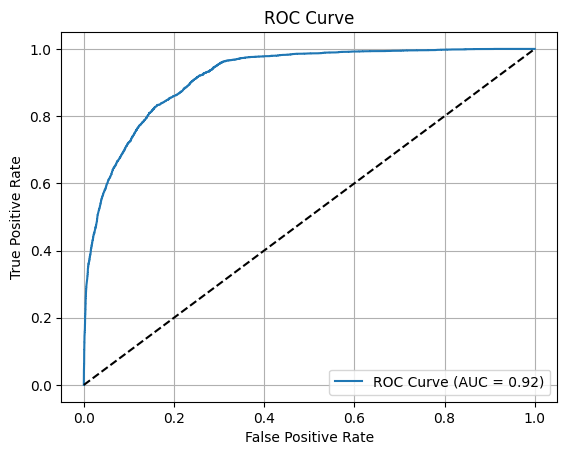

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc:.2f}')

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend([f'ROC Curve (AUC = {auc:.2f})'])
plt.title('ROC Curve')
plt.grid(True)
plt.show()

Es cierto que obtenemos un area bajo la ROC demasiado alta. Esto puede ser debido a un sobreajuste del modelo.

Tambien puede ser que las cosas de vez en cuando salgan bien, lo que significa que el modelo se ajusta muy bien a los datos y predice con una muy buena precision.

Lo veremos a continuacion.

### Curva Precision-Recall y F1 score

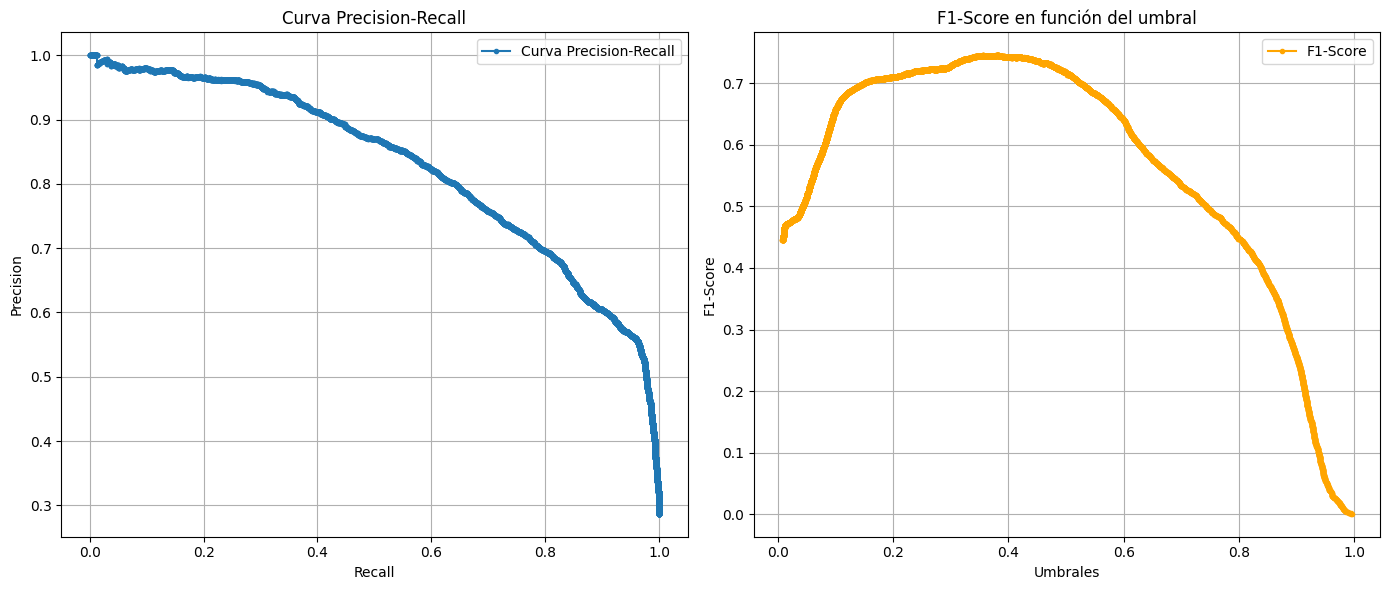

In [259]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Curvas de precisión y recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Hallamos el f1 score para cada umbral
f1_scores = 2 * (precision * recall) / (precision + recall)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mostrar las curvas de precision y recall
axes[0].plot(recall, precision, marker='.', label='Curva Precision-Recall')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Curva Precision-Recall')
axes[0].legend()
axes[0].grid(True)

# Mostramos el f1
axes[1].plot(thresholds, f1_scores[:-1], marker='.', color='orange', label='F1-Score')
axes[1].set_xlabel('Umbrales')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('F1-Score en función del umbral')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Vemos que la curva precision-recall tiene un buen aspecto, ya que al principio el modelo es capaz de obtener una precision casi perfecta con un recall muy bajo, y a medida que aumenta el recall se sacrifica la precision, siguiendo la tendencia descendente que se ha de tener.

En cuanto al f1 score, alcanzamos un valor maximo de 0.75 aproximadamente, lo cual es un valor bastante razonable teniendo en cuenta las demas metricas de validacion del modelo. 

A su vez, el comportamiento del f1 es correcto, ya que su valor tiende a disminuir en los umbrales situados mas en los extremos.

### Validacion Cruzada

Precisión en cada fold: [0.77967447 0.75845094 0.78901734 0.74488138 0.79332616]
Precisión promedio: 0.7730700571016216




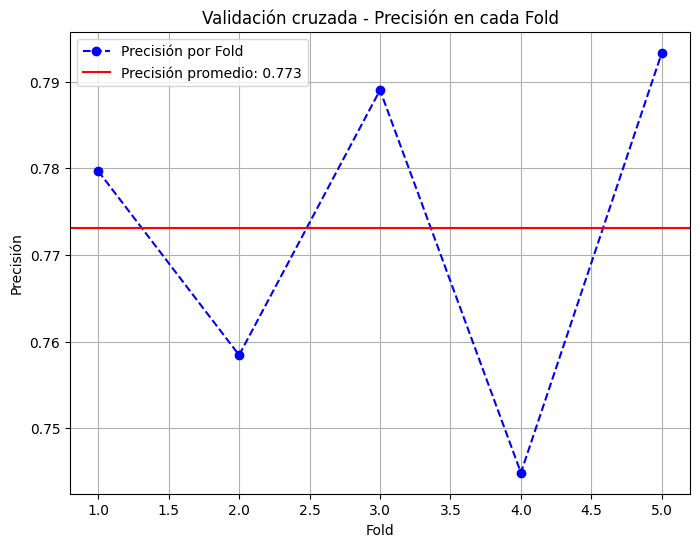

In [260]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score
import matplotlib.pyplot as plt

# Definimos la validación cruzada con 5 folds
kf = StratifiedKFold(n_splits=5)

# Evaluación de la precisión
precision_scorer = make_scorer(precision_score)
precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)

# Mostramos los resultados de precisión en cada fold y el promedio
print("Precisión en cada fold:", precision_scores)
print("Precisión promedio:", precision_scores.mean())
print('\n')

# Mostramos la grafica
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(precision_scores)+1), precision_scores, marker='o', linestyle='--', color='blue', label='Precisión por Fold')
plt.axhline(y=precision_scores.mean(), color='red', linestyle='-', label=f'Precisión promedio: {precision_scores.mean():.3f}')
plt.title('Validación cruzada - Precisión en cada Fold')
plt.xlabel('Fold')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()



Aunque vemos que la precision varia un poco entre cada uno de los folds, siendo la mayor variacion cercana al 3%, no se produce ninguna variacion significante con respecto a las demas.

Esto nos da a entender que aunque el area bajo la curva ROC (AUC) sea del 94%, el modelo no parece estar sobreentrenado ni presenta ningun sobreajuste, simplemente es un modelo que se ajusta muy bien a los datos.

### Curva de Aprendizaje

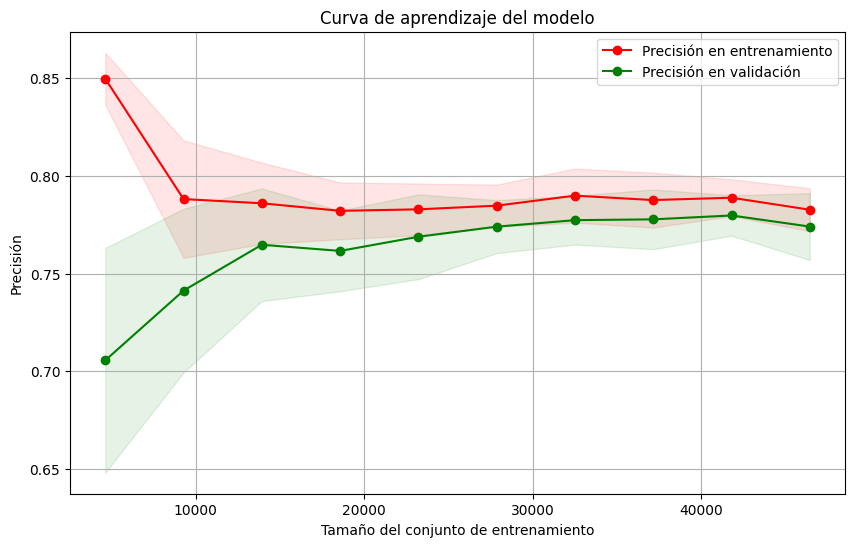

In [261]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Usamos la función learning_curve para obtener las puntuaciones en el entrenamiento y validación
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='precision', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculamos las medias y desviaciones estándar de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Mostramos la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión en validación")

plt.title("Curva de aprendizaje del modelo")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid()
plt.show()
